SAMPLE NEURAL NETWORK CODE

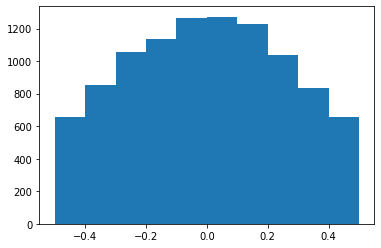

In [2]:
# We like to create random numbers with a normal distribution, but the numbers have to be bounded. 
# This is not the case with np.random.normal(), because it doesn't offer any bound parameter.
# Here we create a version of the truncated normal, from scipy.stats, which makes it easier to implement.

We can use truncnorm from scipy.stats for this purpose.
from scipy.stats import truncnorm
import matplotlib.pyplot as plt
%matplotlib inline

def truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm(
        (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)

X = truncated_normal(mean=0, sd=0.4, low=-0.5, upp=0.5)
s = X.rvs(10000)

plt.hist(s)
plt.show()

In [3]:
# We will need to define the train and run method later. 
# Instead of defining the weight matrices within the __init__ method of our Python class, we define them in a sparate method for reasons of clarity:

import numpy as np

class NeuralNetwork:
    
    def __init__(self, 
                 no_of_in_nodes, 
                 no_of_out_nodes, 
                 no_of_hidden_nodes,
                 learning_rate):
        self.no_of_in_nodes = no_of_in_nodes
        self.no_of_out_nodes = no_of_out_nodes 
        self.no_of_hidden_nodes = no_of_hidden_nodes
        self.learning_rate = learning_rate  
        self.create_weight_matrices()


        
    def create_weight_matrices(self):

        rad = 1 / np.sqrt(self.no_of_in_nodes)
        X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
        self.weights_in_hidden = X.rvs((self.no_of_hidden_nodes, 
                                       self.no_of_in_nodes))

        rad = 1 / np.sqrt(self.no_of_hidden_nodes)
        X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
        self.weights_hidden_out = X.rvs((self.no_of_out_nodes, 
                                        self.no_of_hidden_nodes))
             
    
    def train(self):
        pass
    
    def run(self):
        pass
    

    
if __name__ == "__main__":
    simple_network = NeuralNetwork(no_of_in_nodes = 3, 
                                   no_of_out_nodes = 2, 
                                   no_of_hidden_nodes = 4,
                                   learning_rate = 0.1)
    print(simple_network.weights_in_hidden)
    print(simple_network.weights_hidden_out)

[[ 0.11563045  0.09941206 -0.26575432]
 [-0.45152324 -0.24299662  0.41601069]
 [ 0.18358225  0.05055272 -0.51322266]
 [ 0.15090448  0.01493886  0.26152223]]
[[ 0.09359028 -0.16725796 -0.45706432 -0.19323187]
 [-0.39414083 -0.28297944  0.21477533 -0.03807558]]


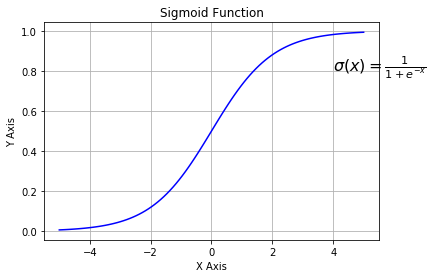

In [4]:
# The sigmoid function belongs to the most often used activation functions. 
# Let us have a look at the graph of the sigmoid function. We use matplotlib to plot the sigmoid function:

import numpy as np
import matplotlib.pyplot as plt
def sigma(x):
    return 1 / (1 + np.exp(-x))

X = np.linspace(-5, 5, 100)


plt.plot(X, sigma(X),'b')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Sigmoid Function')

plt.grid()

plt.text(4, 0.8, r'$\sigma(x)=\frac{1}{1+e^{-x}}$', fontsize=16)


plt.show()

In [5]:
# We can use this as the activation function of our neural network. 
# As you most probably know, we can directly assign a new name, when we import the function:

from scipy.special import expit as activation_function

import numpy as np
from scipy.special import expit as activation_function
from scipy.stats import truncnorm

def truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm(
        (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)


class NeuralNetwork:
           
    def __init__(self, 
                 no_of_in_nodes, 
                 no_of_out_nodes, 
                 no_of_hidden_nodes,
                 learning_rate):
        self.no_of_in_nodes = no_of_in_nodes
        self.no_of_out_nodes = no_of_out_nodes
        self.no_of_hidden_nodes = no_of_hidden_nodes
        self.learning_rate = learning_rate 
        self.create_weight_matrices()
        
    def create_weight_matrices(self):
        """ A method to initialize the weight matrices of the neural network"""
        rad = 1 / np.sqrt(self.no_of_in_nodes)
        X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
        self.weights_in_hidden = X.rvs((self.no_of_hidden_nodes, 
                                       self.no_of_in_nodes))
        rad = 1 / np.sqrt(self.no_of_hidden_nodes)
        X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
        self.weights_hidden_out = X.rvs((self.no_of_out_nodes, 
                                        self.no_of_hidden_nodes))
    
    
    def train(self, input_vector, target_vector):
        pass
            
    
    def run(self, input_vector):
        """
        running the network with an input vector input_vector. 
        input_vector can be tuple, list or ndarray
        """
        
        # turning the input vector into a column vector
        input_vector = np.array(input_vector, ndmin=2).T

        output_vector = np.dot(self.weights_in_hidden, input_vector)
        output_vector = activation_function(output_vector)
        
        output_vector = np.dot(self.weights_hidden_out, output_vector)
        output_vector = activation_function(output_vector)
    
        return output_vector

In [6]:
# Rather than defining the sigmoid function, we can use the expit function from scipy.special, which is an implementation of the sigmoid function. 
# It can be applied on various data classes like int, float, list, numpy,ndarray and so on. 
# The result is an ndarray of the same shape as the input data x.

from scipy.special import expit
print(expit(3.4))
print(expit([3, 4, 1]))
print(expit(np.array([0.8, 2.3, 8])))

0.9677045353015494
[0.95257413 0.98201379 0.73105858]
[0.68997448 0.90887704 0.99966465]


In [7]:
# We can use this as the activation function of our neural network. 
# As you most probably know, we can directly assign a new name, when we import the function:

from scipy.special import expit as activation_function

import numpy as np
from scipy.special import expit as activation_function
from scipy.stats import truncnorm

def truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm(
        (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)


class NeuralNetwork:
           
    def __init__(self, 
                 no_of_in_nodes, 
                 no_of_out_nodes, 
                 no_of_hidden_nodes,
                 learning_rate):
        self.no_of_in_nodes = no_of_in_nodes
        self.no_of_out_nodes = no_of_out_nodes
        self.no_of_hidden_nodes = no_of_hidden_nodes
        self.learning_rate = learning_rate 
        self.create_weight_matrices()
        
    def create_weight_matrices(self):
        """ A method to initialize the weight matrices of the neural network"""
        rad = 1 / np.sqrt(self.no_of_in_nodes)
        X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
        self.weights_in_hidden = X.rvs((self.no_of_hidden_nodes, 
                                       self.no_of_in_nodes))
        rad = 1 / np.sqrt(self.no_of_hidden_nodes)
        X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
        self.weights_hidden_out = X.rvs((self.no_of_out_nodes, 
                                        self.no_of_hidden_nodes))
    
    
    def train(self, input_vector, target_vector):
        pass
            
    
    def run(self, input_vector):
        """
        running the network with an input vector input_vector. 
        input_vector can be tuple, list or ndarray
        """
        
        # turning the input vector into a column vector
        input_vector = np.array(input_vector, ndmin=2).T

        output_vector = np.dot(self.weights_in_hidden, input_vector)
        output_vector = activation_function(output_vector)
        
        output_vector = np.dot(self.weights_hidden_out, output_vector)
        output_vector = activation_function(output_vector)
    
        return output_vector

In [8]:
# We can instantiate and run this network, but the results will not make sense. 
# They are based on the random weight matrices:

simple_network = NeuralNetwork(no_of_in_nodes=2, 
                               no_of_out_nodes=2, 
                               no_of_hidden_nodes=10,
                               learning_rate=0.6)

simple_network.run([(3, 4)])

array([[0.45962828],
       [0.47287939]])

In [9]:
# We can also define our own sigmoid function with the decorator vectorize from numpy:

@np.vectorize
def sigmoid(x):
    return 1 / (1 + np.e ** -x)

#sigmoid = np.vectorize(sigmoid)
sigmoid([3, 4, 5])

array([0.95257413, 0.98201379, 0.99330715])

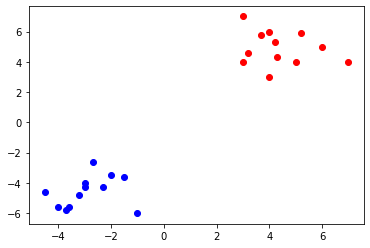

In [10]:
# We will test our network with an example, data1 and data2 as defined below:

import numpy as np
from matplotlib import pyplot as plt

data1 = [((3, 4), (0.99, 0.01)), ((4.2, 5.3), (0.99, 0.01)), 
         ((4, 3), (0.99, 0.01)), ((6, 5), (0.99, 0.01)), 
         ((4, 6), (0.99, 0.01)), ((3.7, 5.8), (0.99, 0.01)), 
         ((3.2, 4.6), (0.99, 0.01)), ((5.2, 5.9), (0.99, 0.01)), 
         ((5, 4), (0.99, 0.01)), ((7, 4), (0.99, 0.01)), 
         ((3, 7), (0.99, 0.01)), ((4.3, 4.3), (0.99, 0.01))]

data2 = [((-3, -4), (0.01, 0.99)), ((-2, -3.5), (0.01, 0.99)), 
         ((-1, -6), (0.01, 0.99)), ((-3, -4.3), (0.01, 0.99)), 
         ((-4, -5.6), (0.01, 0.99)), ((-3.2, -4.8), (0.01, 0.99)), 
         ((-2.3, -4.3), (0.01, 0.99)), ((-2.7, -2.6), (0.01, 0.99)), 
         ((-1.5, -3.6), (0.01, 0.99)), ((-3.6, -5.6), (0.01, 0.99)), 
         ((-4.5, -4.6), (0.01, 0.99)), ((-3.7, -5.8), (0.01, 0.99))]



data = data1 + data2
np.random.shuffle(data)

points1, labels1 = zip(*data1)
X, Y = zip(*points1)
plt.scatter(X, Y, c="r")

points2, labels2 = zip(*data2)
X, Y = zip(*points2)
plt.scatter(X, Y, c="b")
plt.show()